In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Required Packages**

In [ ]:
from collections import Counter
import random
import numpy as np
import pandas as pd

from nltk.tokenize import RegexpTokenizer
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

import torch
import torch.nn  as  nn
import torch.optim as optim
import torch.nn.functional as F

# **Importing the Dataset**

For our project we are using the Text8 dataset

In [ ]:
F=open('/content/drive/My Drive/MLProject/text8')

In [ ]:

data=F.read()

In [ ]:
len(data)

100000000

In [ ]:
data=data[0:10000000]

# **Preprocessing the dataset**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
# stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def process_data(data):
  data=data.lower()
  data=data.split()
  stop_words = set(stopwords.words('english'))
  data1=[]
  for word in data:
    if word not in stop_words:
      data1.append(word)
  word_counts = Counter(data1)
  data2 = [word for word in data1 if word_counts[word] > 5]
  data=data2


  E_count=1
  # dictioanry for keeping the frequency of each word
  E_wordCount={}
  # dictioanry to find the index for a word in English
  E_word2index={}

  # dictionary to find the English word for a particular index
  E_index2word={}

  for word in data:
    E_wordCount[word]= E_wordCount.get(word,0)+1
    if (word not in E_word2index.keys()): # check if the token already exists in English dictionary
      # if the token is not present in English dictionary then add it to word2index and index2word English dictionary
      E_word2index[word]= E_count
      E_index2word[E_count]=word
      E_count+=1 # increasing the count of words in English vocabulary
    else:
      E_wordCount[word]+=1 # if the token exists in dictionary then simply increase it's count of occurrence
  return data,E_wordCount,E_word2index,E_index2word


In [ ]:
processed_data,E_wordCount,E_word2index,E_index2word=process_data(data)

In [ ]:
#vocab
word=[word for word in processed_data]
vocab=set(word)

In [ ]:
vocab=set(word)
print(len(word))
print("vocab size:",len(vocab))

997396
vocab size: 17039


In [ ]:
V=len(vocab)

In [ ]:
V

17039

# **SubSampling**

In [ ]:
wordinint=[]
for word in processed_data:
  wordinint.append(E_word2index[word])

In [ ]:
print(wordinint[:30])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 13, 16, 3, 17, 6, 18, 19, 20, 21, 6, 22, 23, 24, 25, 26]


In [ ]:


threshold = 1e-5
word_counts = Counter(wordinint)
#print(list(word_counts.items())[0])  # dictionary of int_words, how many times they appear

total_count = len(processed_data)
freq={}
for word,count in word_counts.items():
  freq[word]=count/total_count
print(freq[1])
p_drop = {word: 1 - np.sqrt(threshold/freq[word]) for word,_ in word_counts.items()}
train_words = [word for word in wordinint if random.random() < (1 - p_drop[word])]

print(train_words[:30])

0.00015740989536753707
[4, 14, 15, 16, 18, 23, 1, 48, 55, 56, 62, 63, 64, 56, 56, 69, 54, 52, 71, 74, 78, 80, 1, 81, 90, 93, 94, 96, 97, 90]


In [ ]:

len(train_words)

290399

In [ ]:
tuples = []
w = 3
for i, word in enumerate(train_words):
  start = max(0,i-w)
  end = min(i+w, len(train_words))
  for j in range(start,end):
    if i!=j:
      tuples.append((word, train_words[j]))
print("There are {} pairs ".format(len(tuples)))

There are 1451986 pairs 


# **Word2Vec Model**

In [ ]:



class W2V_Model(nn.Module):

    def __init__(self, embedding_size, vocab_size):
        super(W2V_Model, self).__init__()
        #embedding layer to get the center word embeeding 
        self.embeddings = nn.Embedding(vocab_size, embedding_size)
        #linear layer to get the similiarity of center word with all the  words
        self.linear = nn.Linear(embedding_size, vocab_size)

        #initialising weights
        self.embeddings.weight.data.uniform_(-1,1)
        self.linear.weight.data.uniform_(-1,1)
        
    def forward(self, word):
        #passing input index to embedding layer
        emb = self.embeddings(word)
        hidden = self.linear(emb)
        #applying softmax
        out = F.log_softmax(hidden)
        return out
    def repre(self,x):
        #return corresponding word embedding
        return self.embeddings(x)

    

# **Training the Model**

In [ ]:
#instantiating the model
w2v=W2V_Model(100,V+1)

In [ ]:
#defining Batch size
batch_size=128


In [ ]:
w2v.eval()

W2V_Model(
  (embeddings): Embedding(17040, 100)
  (linear): Linear(in_features=100, out_features=17040, bias=True)
)

In [ ]:
#making list of target,context pairs
data=[]
for i in range(0,len(tuples)):
  t=[]
  # x=np.zeros(V)
  # x[context_tuple_list[j][0]]=1
  t.append(tuples[j][0])
  t.append(tuples[j][1])
  data.append(t)




In [ ]:
len(data)

1451986

In [ ]:
#train data iterator
train_iter = DataLoader(data, batch_size=1024,shuffle=True) 

In [ ]:
#defining loss function and optimizer
criterion = nn.CrossEntropyLoss() 
optimizer = optim.AdamW(w2v.parameters(), lr=0.001) # AdamW optimizer is used 



In [ ]:
path = "/content/drive/My Drive/MLProject/model"
path5 = "/content/drive/My Drive/MLProject/model5"
path10 = "/content/drive/My Drive/MLProject/model10"
path15 = "/content/drive/My Drive/MLProject/model15"
path20 = "/content/drive/My Drive/MLProject/model20"
path25 = "/content/drive/My Drive/MLProject/model25"
path30 = "/content/drive/My Drive/MLProject/model30"
path35 = "/content/drive/My Drive/MLProject/model35"

In [ ]:
#training loop
import time
training_loss=[]
epochs=12
sum=0
for epoch in range(epochs):
  l=0
  t0 = time.time()
  for id, (x,y) in enumerate(train_iter): 
    # print(type(x))
    output=w2v(x) #getting output vector
    
    optimizer.zero_grad()  
    loss=criterion(output,y)  #calculating loss
    loss.backward()  #gradient descent
    optimizer.step()
    l=l+loss.item()
    del x,y
  if(epoch==5): # saving the model after every 5 epochs 
    torch.save(w2v,path5)
  elif(epoch==10):
    torch.save(w2v,path10)
  elif(epoch==15):
    torch.save(w2v,path15)
  elif(epoch==20):
    torch.save(w2v,path20)
  elif(epoch==25):
    torch.save(w2v,path25)
  elif(epoch==30):
    torch.save(w2v,path30)
  elif(epoch==35):
    torch.save(w2v,path35)
  training_loss.append(l)    

  print("--------epoch:",epoch,":",l)
  print('Time taken :  {} seconds'.format(time.time() - t0))
  sum=sum+time.time()-t0
print("--------------averge time taken by epoch:",sum/epochs)
    



    

--------epoch: 0 : 345.2750530495541
Time taken :  528.3822944164276 seconds
--------epoch: 1 : 0.8128427078772802
Time taken :  522.377881526947 seconds
--------epoch: 2 : 0.27803224764647894
Time taken :  523.9257354736328 seconds
--------epoch: 3 : 0.1189407937345095
Time taken :  522.1325790882111 seconds
--------epoch: 4 : 0.054043468669988215
Time taken :  520.069194316864 seconds
--------epoch: 5 : 0.024987392668663233
Time taken :  517.698323726654 seconds
--------epoch: 6 : 0.01159631462815014
Time taken :  520.052973985672 seconds
--------epoch: 7 : 0.005355357368898694
Time taken :  521.285080909729 seconds
--------epoch: 8 : 0.0024827716306390357
Time taken :  522.415937423706 seconds
--------epoch: 9 : 0.0013483761796351246
Time taken :  517.4170773029327 seconds
--------epoch: 10 : 0.00032413003629727655
Time taken :  506.1245234012604 seconds
--------epoch: 11 : 2.6226042137977856e-05
Time taken :  503.82602286338806 seconds
--------epoch: 12 : 0.0
Time taken :  498.7753

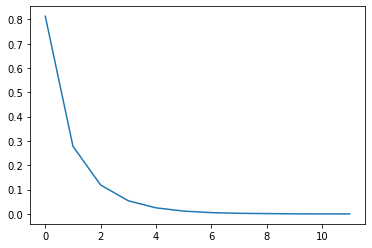

In [ ]:
#plot of loss versus epoch
import matplotlib.pyplot as plt
plt.plot(range(len(training_loss[1:])),training_loss[1:])

In [ ]:
torch.save(w2v,"/content/drive/My Drive/MLProject/model")

In [ ]:
w2v=torch.load("/content/drive/My Drive/MLProject/model")

# **Visualising Word2Vec word vectors**

In [ ]:
X=[]
y=[]
count=0
for word in vocab:
  if(count>100):
    break
  i=E_word2index[word]
  # print(i)
  t=w2v.repre(torch.tensor(i))
  X.append(t.tolist())
  y.append(word)
  count=count+1



In [ ]:
len(X[0])

100

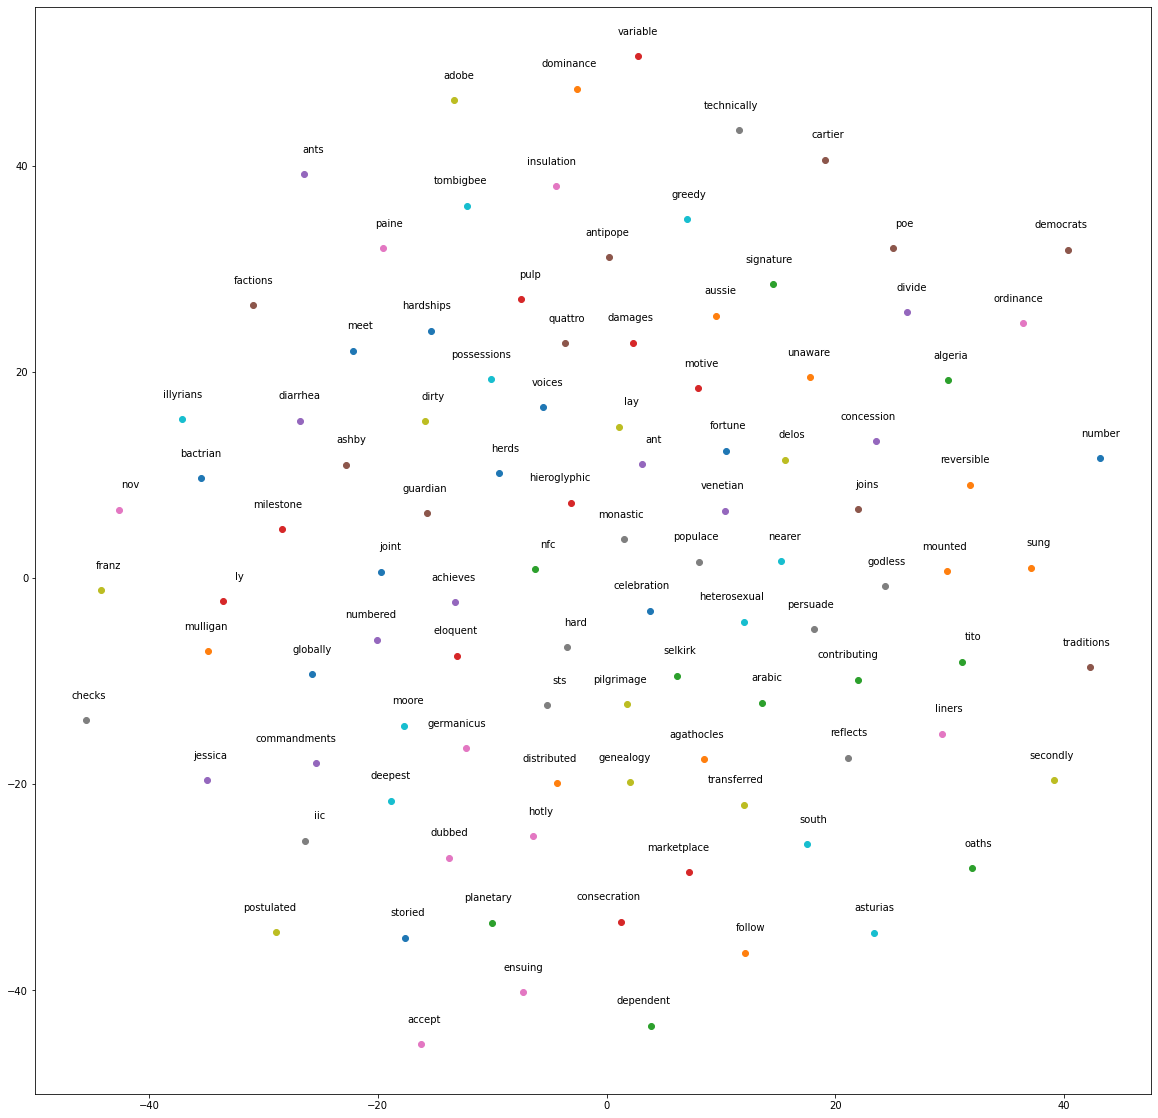

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=500, random_state=23)
values = tsne_model.fit_transform(X)

x1 = []
x2= []
for value in values:
    x1.append(value[0])
    x2.append(value[1])
    
plt.figure(figsize=(20, 20)) 
for i in range(len(X)):
    plt.scatter(x1[i],x2[i])
    plt.annotate(y[i],
                  xy=(x1[i], x2[i]),
                  xytext=(20, 20),
                  textcoords='offset points',
                  ha='right',
                  va='bottom')
plt.show()

In [ ]:
E_word2index['better']

1958

# **Sentiment analysis**

In [ ]:
file1 = open('/content/drive/MyDrive/Unsupervised learning encoder/1000.pos') 
file2 = open('/content/drive/MyDrive/Unsupervised learning encoder/1000.neg') 
file3 = open('/content/drive/MyDrive/Unsupervised learning encoder/100.pos') 
file4 = open('/content/drive/MyDrive/Unsupervised learning encoder/100.neg') 

def processing(F):
  x=[]
  for line in F:
    l=line.split()
    stop_words = set(stopwords.words('english'))
    d1=[]
    for word in l:
     if word not in stop_words:
        if(word  in vocab):
          d1.append(E_word2index[word])
        else:
          d1.append(0)
    x.append(d1)
  return x
  

In [ ]:
train_data=processing(file1)
print(len(train_data))
train_data=train_data+processing(file2)
test_data=processing(file3)
test_data=test_data+processing(file4)
len(test_data)

1000


200

In [ ]:
train_label=[1]*1000+[0]*1000
test_label=[1]*100+[0]*100
len(train_label)

2000

# **sentiment analysis using our word2vec model**

In [ ]:
embedding_size=100
def avg_vectors(X):
  data=[]
  for l in X:
    v=[]
    for i in l:
      v.append(w2v.repre(torch.tensor(i)).tolist())
    avg_vec=np.mean(np.array(v),axis=0)
    data.append(avg_vec)
  return data



In [ ]:
train=avg_vectors(train_data)

In [ ]:
test=avg_vectors(test_data)

**#Training Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=100).fit(train, train_label)

In [ ]:
#accuracy on training data
print("accuracy on training set",clf.score(train,train_label))

accuracy on training set 0.7635


In [ ]:
print("accuracy on test data",clf.score(test,test_label))

accuracy on test data 0.7


# **sentiment analysis using one hot encoding**

In [ ]:
def one_hot(X):
  data=[]
  for l in X:
    v=[]
    for i in l:
      t=[0]*V
      t[i]=1
      v.append(t)
    avg_vec=np.mean(np.array(v),axis=0)
    data.append(avg_vec)
  return np.array(data)




In [ ]:
train_hot=one_hot(train_data)

In [ ]:
test_hot=one_hot(test_data)

**Applying PCA to reduce the dimension to 100**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(train_hot)


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train=pca.transform(train_hot)

In [ ]:
len(X_train[0])

100

In [ ]:
X_test=pca.transform(test_hot)

**applying logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=0,max_iter=200).fit(X_train, train_label)

In [ ]:
#accuracy on training data
print("accuracy on training set",clf.score(X_train,train_label))

accuracy on training set 0.4625


In [ ]:


#accuracy on testing data
print("accuracy on test set",clf.score(X_test,test_label))

accuracy on test set 0.48
